均方误差 (MSE): 37.3997
均方根误差 (RMSE): 6.1155
平均绝对误差 (MAE): 4.2577
决定系数 (R²): 0.8201


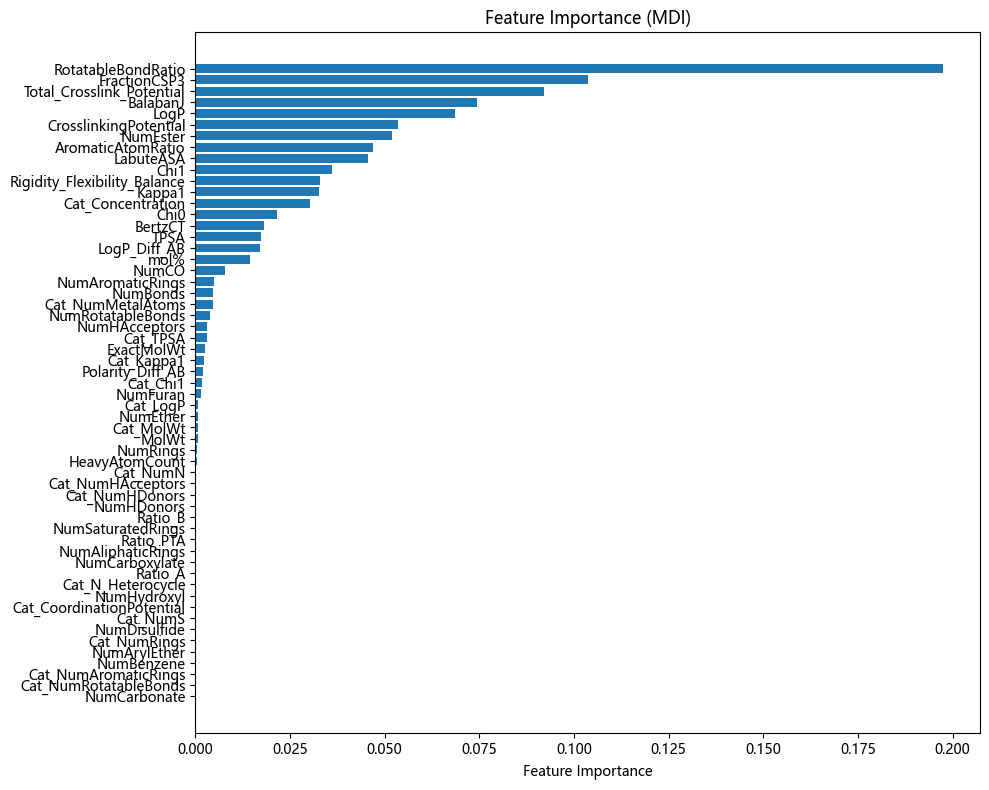

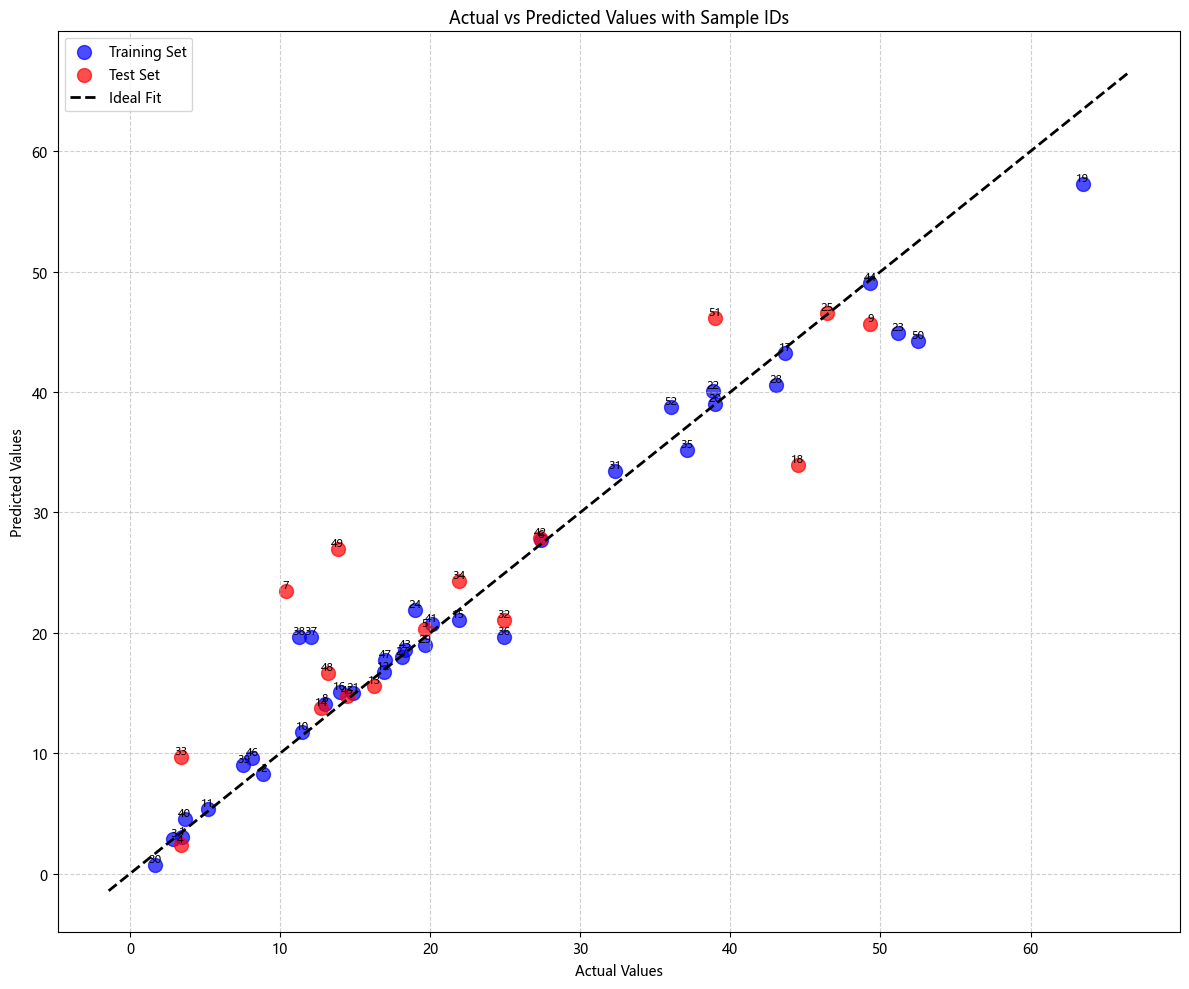

模型已保存为 'gradient_boosting_model.pkl'
训练集大小: 35 样本
测试集大小: 16 样本
训练集 MSE: 9.7958
训练集 R²: 0.9627
过拟合程度 (R² 差异): 0.1426


In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 载入数据
data = pd.read_csv('data/polymer_features_enhanced.csv')

# 保存编号列（第一列）
sample_ids = data.iloc[:, 0]

# 分离特征和目标变量
X = data.iloc[:, 2:]  # 从第三列开始的所有列作为特征
y = data.iloc[:, 1]   # 第二列作为目标变量

# 按照7:3的比例划分训练集和测试集，同时分割编号
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, sample_ids, test_size=0.3, random_state=42)

# 定义模型参数
best_params = {
    'n_estimators': 158,
    'learning_rate': 0.14307675214589186,
    'max_depth': 8,
    'min_samples_split': 3,
    'min_samples_leaf': 6,
    'subsample': 0.8885344819700561,
    'max_features': 0.3227577583444496,
    'alpha': 0.35142192644949233,
    'loss': 'squared_error'  # 默认值，可根据需要修改
}

# 创建并训练模型
model = GradientBoostingRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差 (MSE): {mse:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")
print(f"平均绝对误差 (MAE): {mae:.4f}")
print(f"决定系数 (R²): {r2:.4f}")

# 可视化特征重要性
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
plt.figure(figsize=(10, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (MDI)')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 解决中文显示问题
import matplotlib as mpl
# 尝试设置中文字体，如果失败则使用英文
try:
    # 尝试使用微软雅黑字体（Windows系统）
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
except:
    # 如果出错，则回退到默认字体并使用英文标签
    print("无法设置中文字体，将使用英文标签")

# 计算训练集的预测值
y_train_pred = model.predict(X_train)

# 绘制训练集和测试集的预测值与真实值的对比图
plt.figure(figsize=(12, 10))

# 创建带有标签的散点图函数
def labeled_scatter(x, y, ids, color, label):
    sc = plt.scatter(x, y, alpha=0.7, color=color, label=label, s=100)
    for i, txt in enumerate(ids):
        plt.annotate(str(txt), (x.iloc[i] if hasattr(x, 'iloc') else x[i], 
                              y[i]), fontsize=8, ha='center', va='bottom')
    return sc

# 绘制带编号的训练集和测试集数据点
labeled_scatter(y_train, y_train_pred, id_train, 'blue', 'Training Set')
labeled_scatter(y_test, y_pred, id_test, 'red', 'Test Set')

# 确定绘图的最小值和最大值
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
margin = (max_val - min_val) * 0.05  # 添加5%的边距
min_val -= margin
max_val += margin

# 绘制理想拟合线
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Sample IDs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('train_test_comparison_with_ids.png', dpi=300)
plt.show()

# 保存模型
import joblib
joblib.dump(model, 'gradient_boosting_model.pkl')
print("模型已保存为 'gradient_boosting_model.pkl'")

# 输出训练集和测试集的大小
print(f"训练集大小: {X_train.shape[0]} 样本")
print(f"测试集大小: {X_test.shape[0]} 样本")

# 如果需要，计算和打印训练集上的性能指标
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"训练集 MSE: {train_mse:.4f}")
print(f"训练集 R²: {train_r2:.4f}")

# 显示过拟合程度（训练集和测试集性能差异）
print(f"过拟合程度 (R² 差异): {train_r2 - r2:.4f}")

Mean Squared Error (MSE): 37.3997
Root Mean Squared Error (RMSE): 6.1155
Mean Absolute Error (MAE): 4.2577
Coefficient of Determination (R²): 0.8201
Top 30 important features:
                         Feature  Importance
15            RotatableBondRatio    0.197383
13                  FractionCSP3    0.103609
55     Total_Crosslink_Potential    0.092173
22                      BalabanJ    0.074288
3                           LogP    0.068665
32         CrosslinkingPotential    0.053504
18                      NumEster    0.051915
33             AromaticAtomRatio    0.046885
5                      LabuteASA    0.045456
25                          Chi1    0.035995
56  Rigidity_Flexibility_Balance    0.032910
26                        Kappa1    0.032630
49             Cat_Concentration    0.030234
24                          Chi0    0.021538
23                       BertzCT    0.018065
4                           TPSA    0.017252
54                  LogP_Diff_AB    0.016991
0             

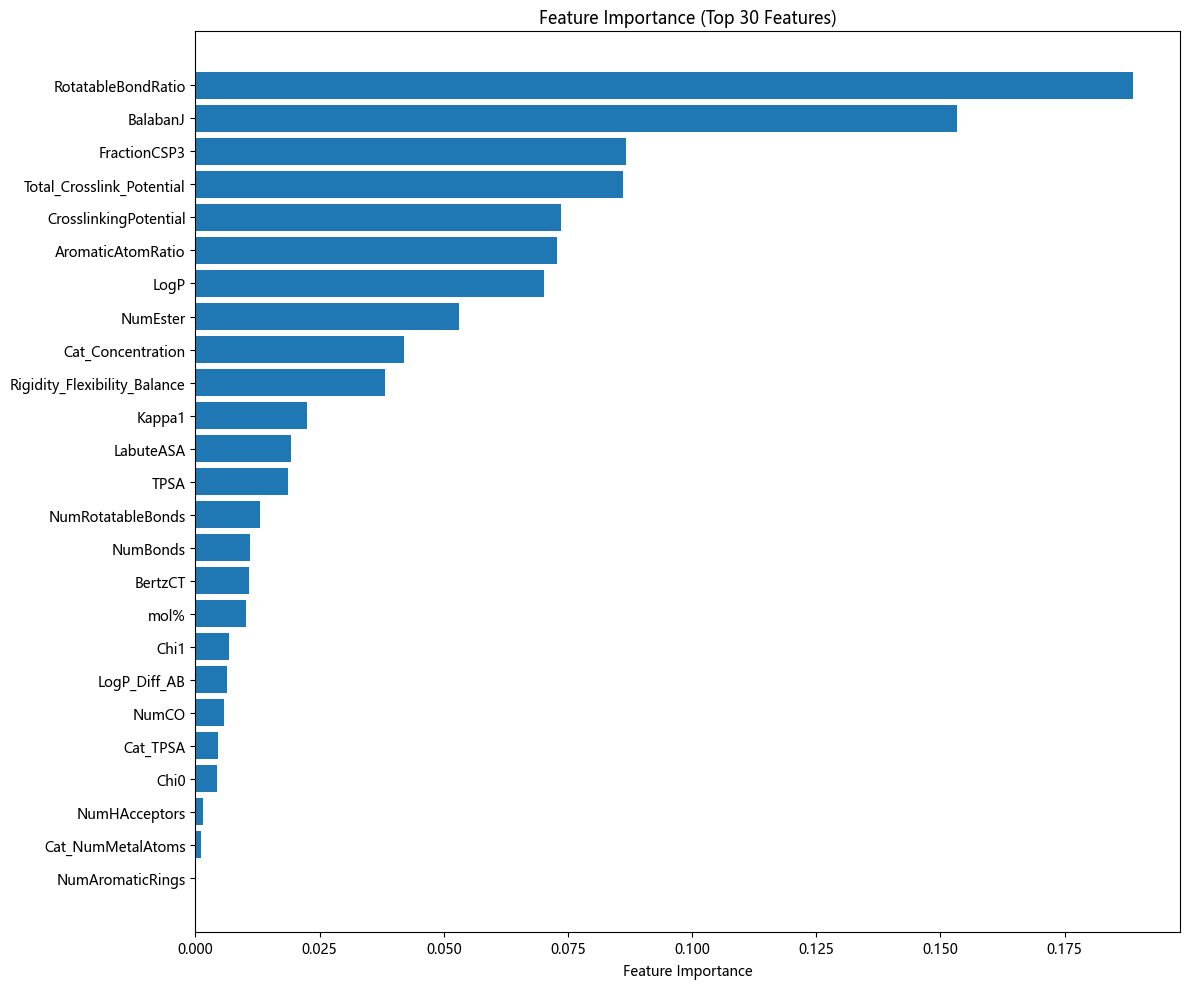

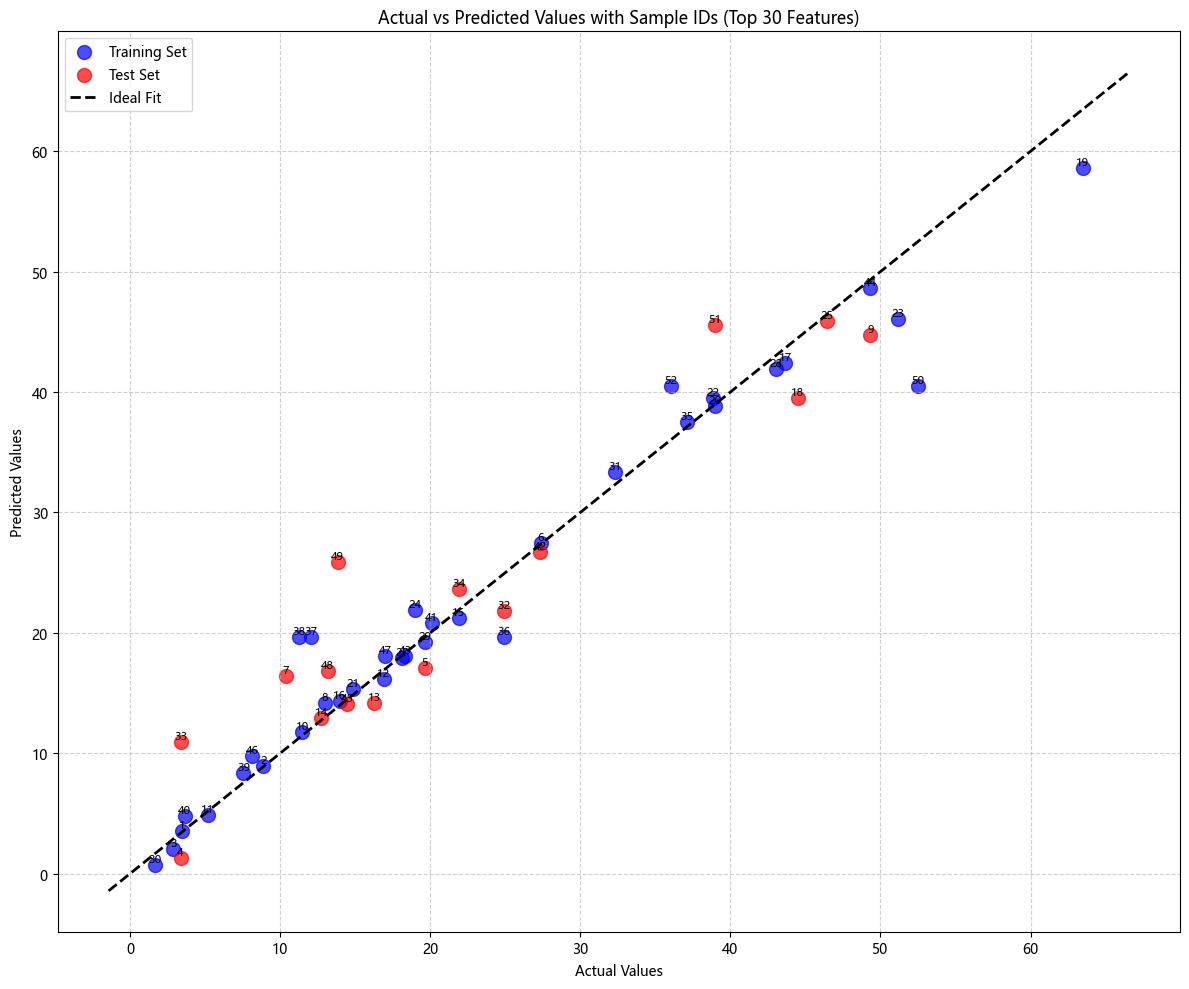

Model with top 30 features saved as 'gradient_boosting_model_top30.pkl'
Training set size: 35 samples
Test set size: 16 samples
Training set MSE: 11.2872
Training set R²: 0.9570
Degree of overfitting (R² difference): 0.0685

Performing SHAP analysis...


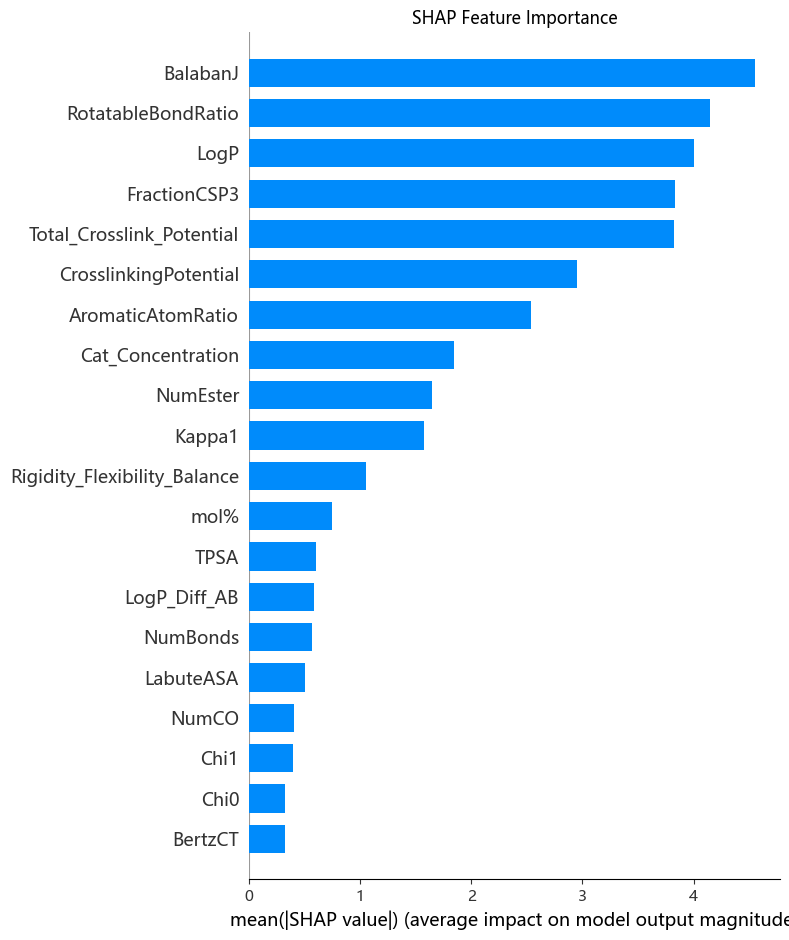

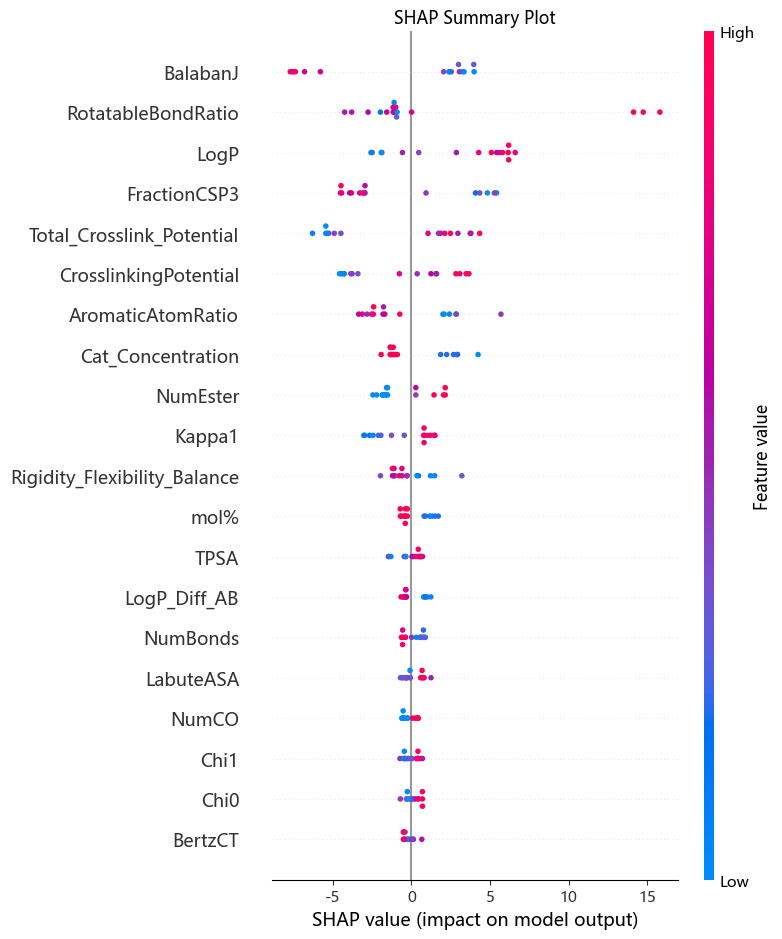

SHAP analysis completed and visualizations saved.


In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib
import shap

# Load data
data = pd.read_csv('data/polymer_features_enhanced.csv')

# Save sample IDs (first column)
sample_ids = data.iloc[:, 0]

# Separate features and target variable
X = data.iloc[:, 2:]  # All columns from the third column as features
y = data.iloc[:, 1]   # Second column as target variable

# Split data into training and test sets at 7:3 ratio, including sample IDs
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, sample_ids, test_size=0.3, random_state=42)

# Define model parameters
best_params = {
    'n_estimators': 158,
    'learning_rate': 0.14307675214589186,
    'max_depth': 8,
    'min_samples_split': 3,
    'min_samples_leaf': 6,
    'subsample': 0.8885344819700561,
    'max_features': 0.3227577583444496,
    'alpha': 0.35142192644949233,
    'loss': 'squared_error'
}

# Create and train the model
model = GradientBoostingRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Coefficient of Determination (R²): {r2:.4f}")

# Visualize feature importance
feature_importance = model.feature_importances_
feature_names = X.columns
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
features_df = features_df.sort_values('Importance', ascending=False)

# Get top 30 features
top_30_features = features_df.head(25)
print("Top 30 important features:")
print(top_30_features)

# Save top 30 features to CSV
top_30_features.to_csv('top_30_features.csv', index=False)
print("Top 30 features saved to 'top_30_features.csv'")

# Create a new dataset with only the top 30 features
top_30_feature_names = top_30_features['Feature'].tolist()
X_train_top30 = X_train[top_30_feature_names]
X_test_top30 = X_test[top_30_feature_names]

# Save the datasets with top 30 features
train_data_top30 = pd.DataFrame({'Sample_ID': id_train, 'Target': y_train})
for feature in top_30_feature_names:
    train_data_top30[feature] = X_train_top30[feature]
train_data_top30.to_csv('train_data_top30.csv', index=False)

test_data_top30 = pd.DataFrame({'Sample_ID': id_test, 'Target': y_test})
for feature in top_30_feature_names:
    test_data_top30[feature] = X_test_top30[feature]
test_data_top30.to_csv('test_data_top30.csv', index=False)
print("Training and test datasets with top 30 features saved to CSV files")

# Retrain the model with only the top 30 features
model_top30 = GradientBoostingRegressor(**best_params, random_state=42)
model_top30.fit(X_train_top30, y_train)

# Make predictions with the new model
y_pred_top30 = model_top30.predict(X_test_top30)

# Evaluate the new model performance
mse_top30 = mean_squared_error(y_test, y_pred_top30)
rmse_top30 = np.sqrt(mse_top30)
mae_top30 = mean_absolute_error(y_test, y_pred_top30)
r2_top30 = r2_score(y_test, y_pred_top30)

print("\nModel performance with top 30 features:")
print(f"Mean Squared Error (MSE): {mse_top30:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_top30:.4f}")
print(f"Mean Absolute Error (MAE): {mae_top30:.4f}")
print(f"Coefficient of Determination (R²): {r2_top30:.4f}")

# Visualize feature importance for the top 30 features model
plt.figure(figsize=(12, 10))
sorted_idx = np.argsort(model_top30.feature_importances_)
plt.barh(np.array(top_30_feature_names)[sorted_idx], model_top30.feature_importances_[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Top 30 Features)')
plt.tight_layout()
plt.savefig('top30_feature_importance.png', dpi=300)
plt.show()

# Calculate predictions for training set
y_train_pred_top30 = model_top30.predict(X_train_top30)

# Create scatter plot function
def labeled_scatter(x, y, ids, color, label):
    sc = plt.scatter(x, y, alpha=0.7, color=color, label=label, s=100)
    for i, txt in enumerate(ids):
        plt.annotate(str(txt), (x.iloc[i] if hasattr(x, 'iloc') else x[i], 
                             y[i]), fontsize=8, ha='center', va='bottom')
    return sc

# Plot actual vs predicted values with sample IDs
plt.figure(figsize=(12, 10))
labeled_scatter(y_train, y_train_pred_top30, id_train, 'blue', 'Training Set')
labeled_scatter(y_test, y_pred_top30, id_test, 'red', 'Test Set')

# Determine min and max values for plot
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
margin = (max_val - min_val) * 0.05  # Add 5% margin
min_val -= margin
max_val += margin

# Plot ideal fit line
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Sample IDs (Top 30 Features)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('top30_train_test_comparison_with_ids.png', dpi=300)
plt.show()

# Save the top 30 features model
joblib.dump(model_top30, 'gradient_boosting_model_top30.pkl')
print("Model with top 30 features saved as 'gradient_boosting_model_top30.pkl'")

# Output training and test set sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Calculate and print performance metrics on the training set
train_mse_top30 = mean_squared_error(y_train, y_train_pred_top30)
train_r2_top30 = r2_score(y_train, y_train_pred_top30)
print(f"Training set MSE: {train_mse_top30:.4f}")
print(f"Training set R²: {train_r2_top30:.4f}")

# Show degree of overfitting
print(f"Degree of overfitting (R² difference): {train_r2_top30 - r2_top30:.4f}")

# Add SHAP analysis
print("\nPerforming SHAP analysis...")

# Create explainer for the top 30 features model
explainer = shap.Explainer(model_top30)
shap_values = explainer(X_test_top30)

# Plot SHAP summary plot
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test_top30, plot_type="bar", show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.savefig('shap_feature_importance.png', dpi=300)
plt.show()

# Plot SHAP summary dot plot
plt.figure(figsize=(14, 12))
shap.summary_plot(shap_values, X_test_top30, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300)
plt.show()

# Skip individual feature dependency plots and force plot as they're not needed
# and force plot with multiple samples causes a NotImplementedError

print("SHAP analysis completed and visualizations saved.")

Mean Squared Error (MSE): 37.3997
Root Mean Squared Error (RMSE): 6.1155
Mean Absolute Error (MAE): 4.2577
Coefficient of Determination (R²): 0.8201
Top 25 important features:
                         Feature  Importance
15            RotatableBondRatio    0.197383
13                  FractionCSP3    0.103609
55     Total_Crosslink_Potential    0.092173
22                      BalabanJ    0.074288
3                           LogP    0.068665
32         CrosslinkingPotential    0.053504
18                      NumEster    0.051915
33             AromaticAtomRatio    0.046885
5                      LabuteASA    0.045456
25                          Chi1    0.035995
56  Rigidity_Flexibility_Balance    0.032910
26                        Kappa1    0.032630
49             Cat_Concentration    0.030234
24                          Chi0    0.021538
23                       BertzCT    0.018065
4                           TPSA    0.017252
54                  LogP_Diff_AB    0.016991
0             

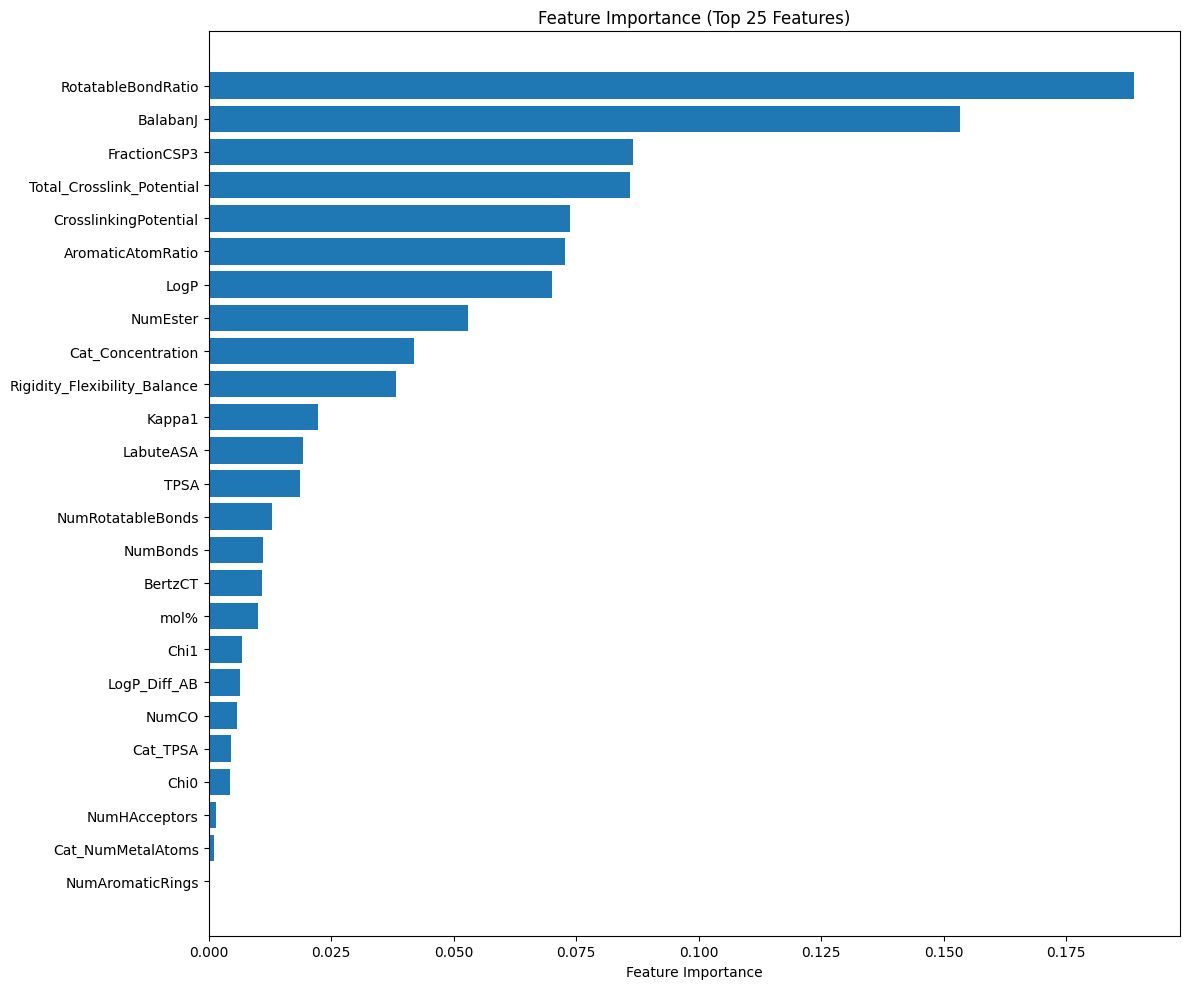

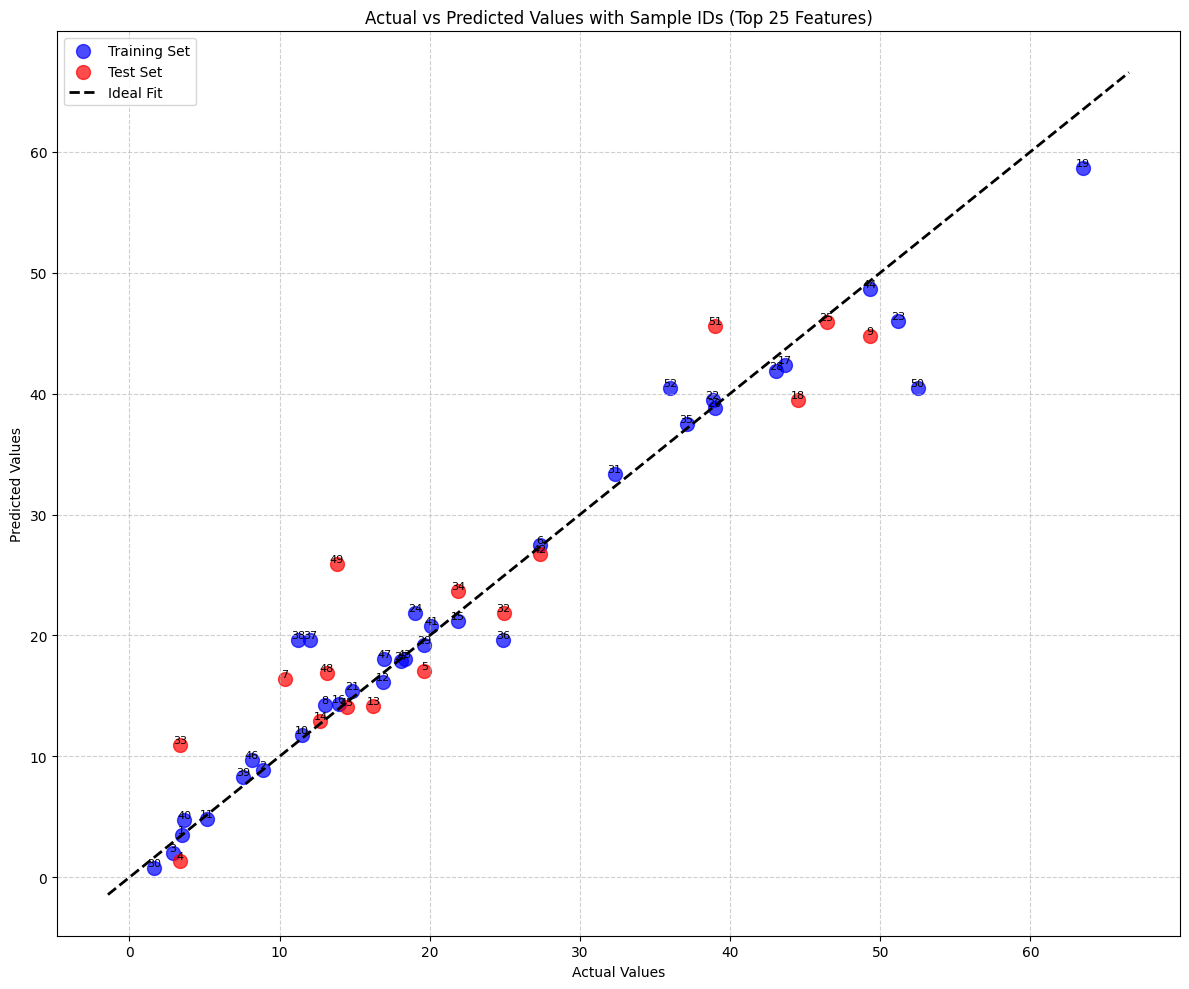

Fitting results saved to 'fitting_results_top25.csv'
Model with top 25 features saved as 'gradient_boosting_model_top25.pkl'
Training set size: 35 samples
Test set size: 16 samples
Training set MSE: 11.2872
Training set R²: 0.9570
Degree of overfitting (R² difference): 0.0685
训练集真实值-预测值已保存至 'train_actual_vs_predicted.csv'
测试集真实值-预测值已保存至 'test_actual_vs_predicted.csv'

Performing SHAP analysis...


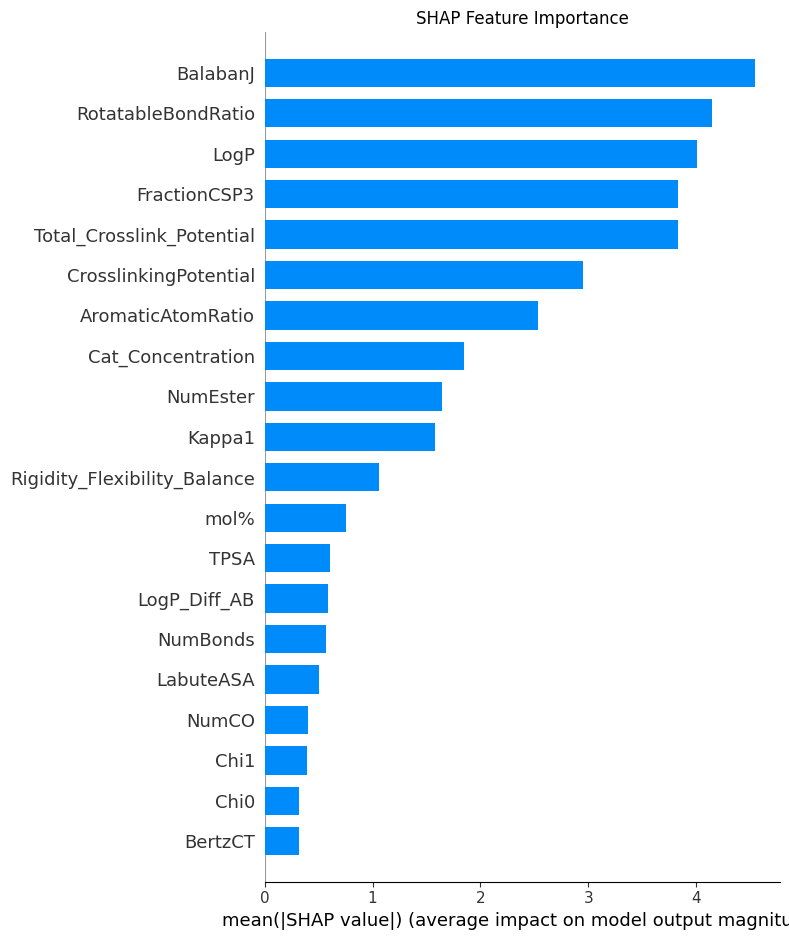

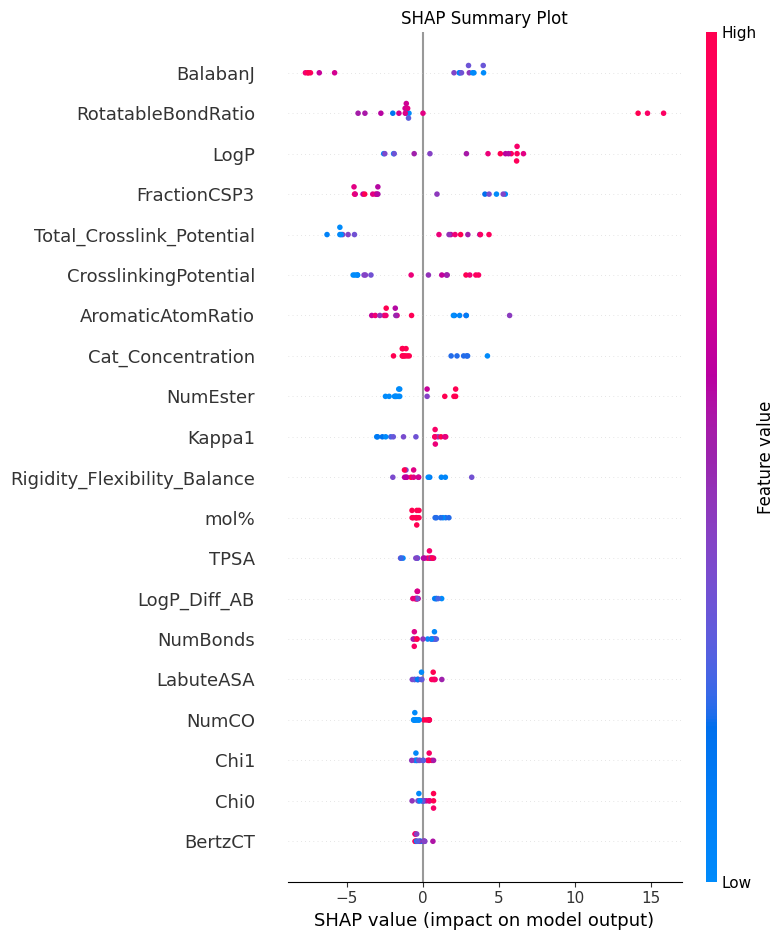

SHAP analysis completed and visualizations saved.

======= Additional Professional Model Evaluation =======

Performing residual analysis...


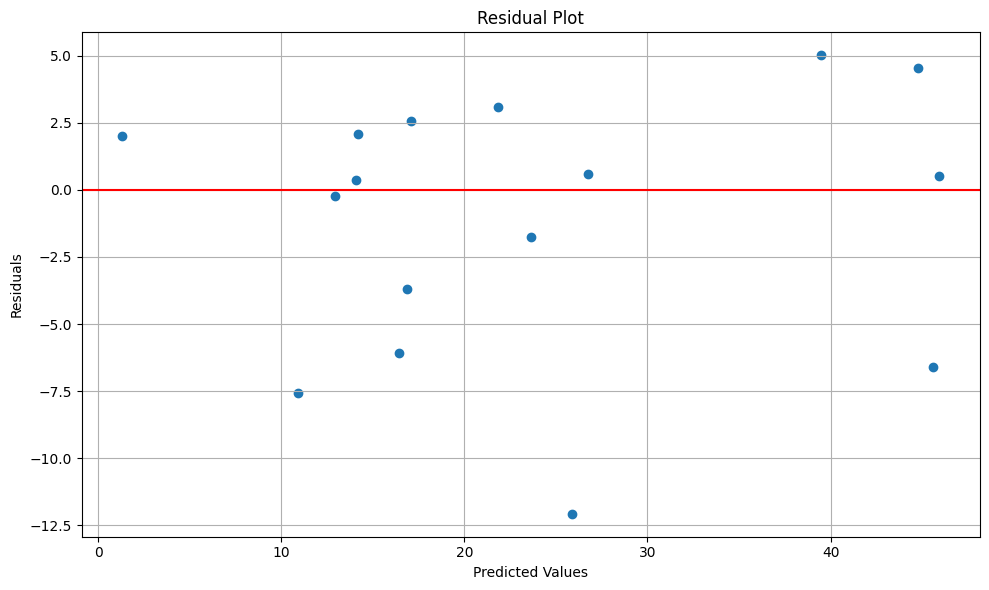


Analyzing correlation between top features...


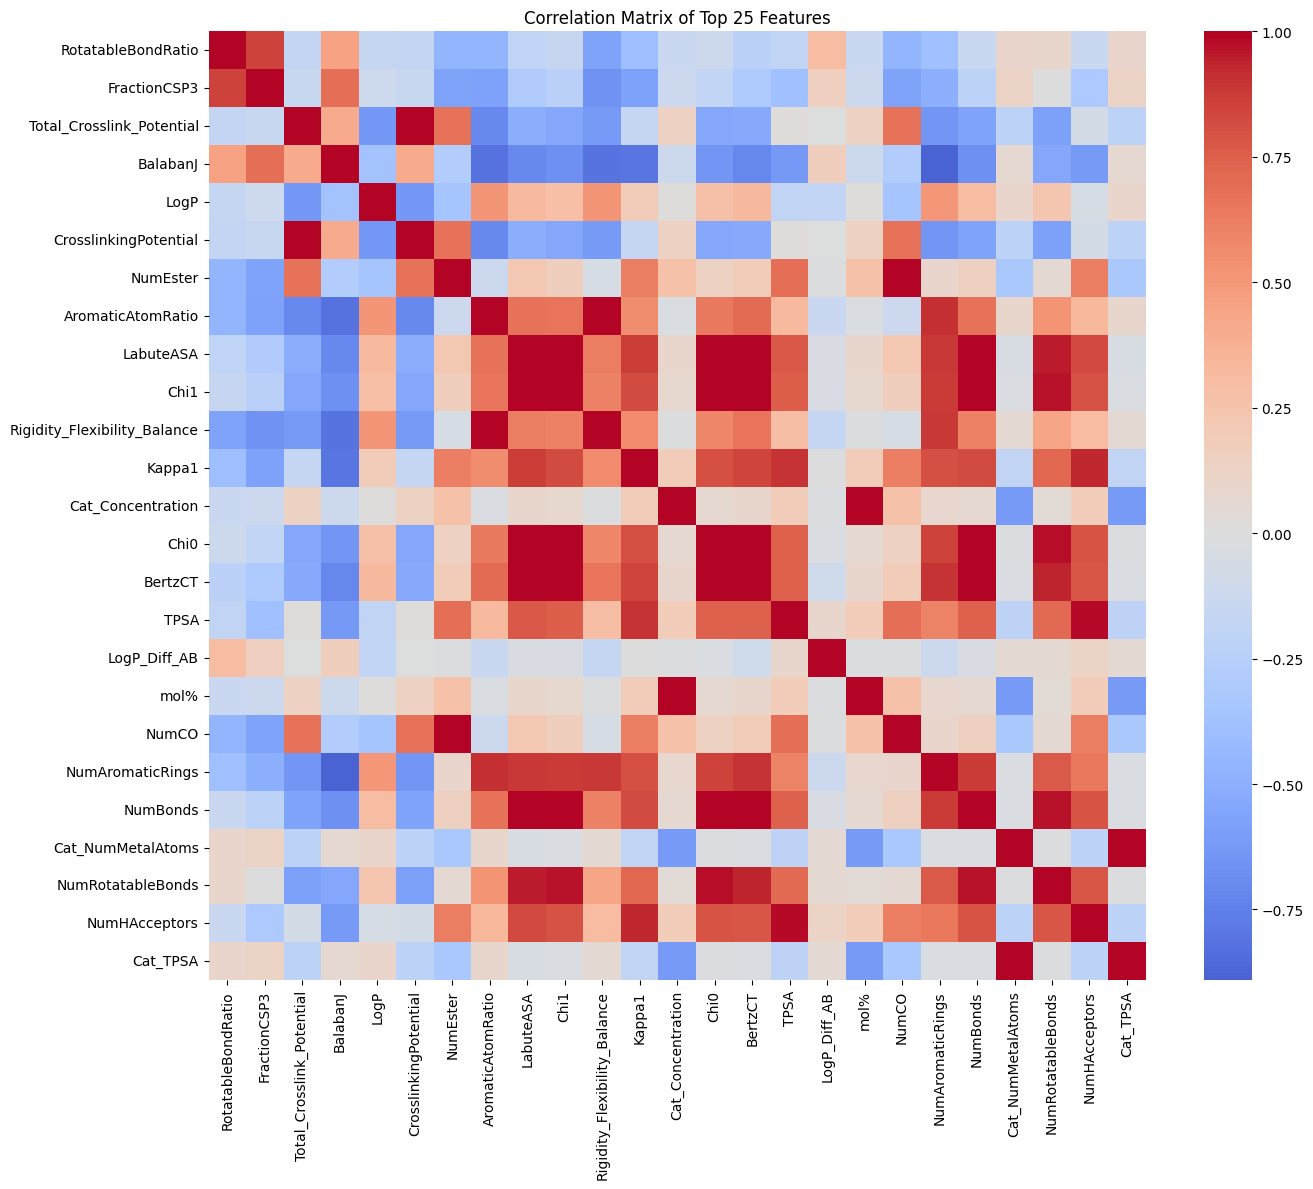


Training alternative models for comparison...
Gradient Boosting: R² = 0.8885, RMSE = 4.8147, MAE = 3.6714
Random Forest: R² = 0.7045, RMSE = 7.8382, MAE = 6.1752
Lasso: R² = 0.2161, RMSE = 12.7659, MAE = 9.8187
Ridge: R² = 0.1939, RMSE = 12.9456, MAE = 9.7814
ElasticNet: R² = 0.2109, RMSE = 12.8081, MAE = 9.6867
SVR: R² = -0.0811, RMSE = 14.9920, MAE = 11.6131

Model comparison saved to 'model_comparison.csv'


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.460e+03, tolerance: 9.195e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.821e+03, tolerance: 9.195e-01


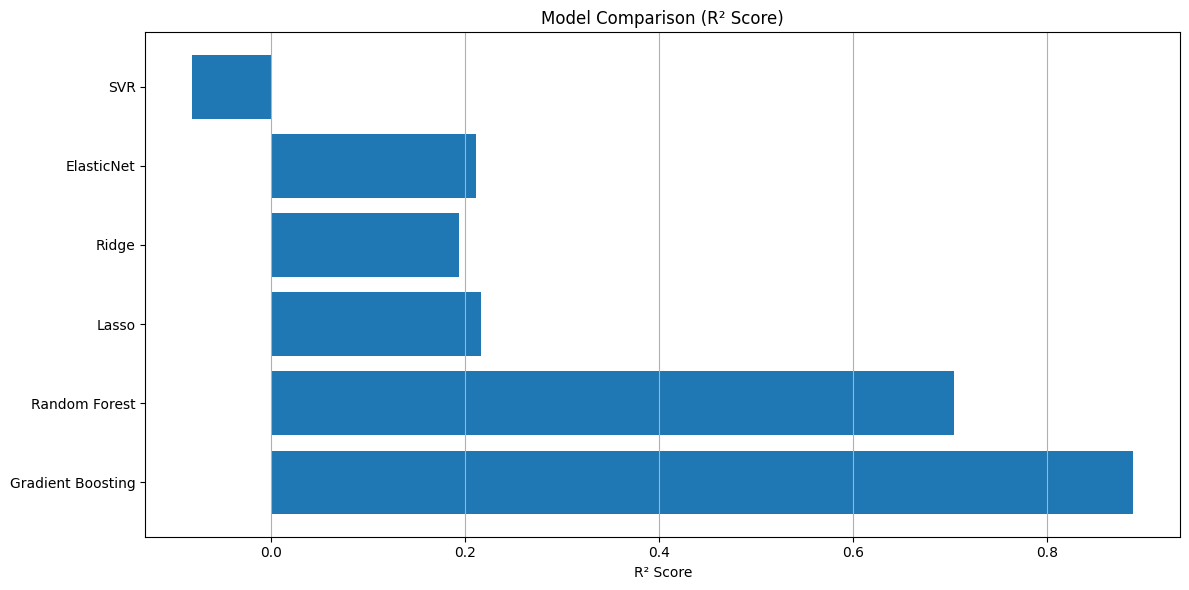


Model evaluation completed.


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib
import shap

# Load data
data = pd.read_csv('data/polymer_features_enhanced.csv')

# Save sample IDs (first column)
sample_ids = data.iloc[:, 0]

# Separate features and target variable
X = data.iloc[:, 2:]  # All columns from the third column as features
y = data.iloc[:, 1]   # Second column as target variable

# Split data into training and test sets at 7:3 ratio, including sample IDs
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, sample_ids, test_size=0.3, random_state=42)

# Define model parameters
best_params = {
    'n_estimators': 158,
    'learning_rate': 0.14307675214589186,
    'max_depth': 8,
    'min_samples_split': 3,
    'min_samples_leaf': 6,
    'subsample': 0.8885344819700561,
    'max_features': 0.3227577583444496,
    'alpha': 0.35142192644949233,
    'loss': 'squared_error'
}

# Create and train the model
model = GradientBoostingRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Coefficient of Determination (R²): {r2:.4f}")

# Visualize feature importance
feature_importance = model.feature_importances_
feature_names = X.columns
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
features_df = features_df.sort_values('Importance', ascending=False)

# Get top 25 features
top_25_features = features_df.head(25)
print("Top 25 important features:")
print(top_25_features)

# Save top 25 features to CSV
top_25_features.to_csv('top_25_features.csv', index=False)
print("Top 25 features saved to 'top_25_features.csv'")

# Create a new dataset with only the top 25 features
top_25_feature_names = top_25_features['Feature'].tolist()
X_train_top25 = X_train[top_25_feature_names]
X_test_top25 = X_test[top_25_feature_names]

# Save the datasets with top 25 features
train_data_top25 = pd.DataFrame({'Sample_ID': id_train, 'Target': y_train})
for feature in top_25_feature_names:
    train_data_top25[feature] = X_train_top25[feature]
train_data_top25.to_csv('train_data_top25.csv', index=False)

test_data_top25 = pd.DataFrame({'Sample_ID': id_test, 'Target': y_test})
for feature in top_25_feature_names:
    test_data_top25[feature] = X_test_top25[feature]
test_data_top25.to_csv('test_data_top25.csv', index=False)
print("Training and test datasets with top 25 features saved to CSV files")

# Retrain the model with only the top 25 features
model_top25 = GradientBoostingRegressor(**best_params, random_state=42)
model_top25.fit(X_train_top25, y_train)

# Make predictions with the new model
y_pred_top25 = model_top25.predict(X_test_top25)

# Evaluate the new model performance
mse_top25 = mean_squared_error(y_test, y_pred_top25)
rmse_top25 = np.sqrt(mse_top25)
mae_top25 = mean_absolute_error(y_test, y_pred_top25)
r2_top25 = r2_score(y_test, y_pred_top25)

print("\nModel performance with top 25 features:")
print(f"Mean Squared Error (MSE): {mse_top25:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_top25:.4f}")
print(f"Mean Absolute Error (MAE): {mae_top25:.4f}")
print(f"Coefficient of Determination (R²): {r2_top25:.4f}")

# Visualize feature importance for the top 25 features model
plt.figure(figsize=(12, 10))
sorted_idx = np.argsort(model_top25.feature_importances_)
plt.barh(np.array(top_25_feature_names)[sorted_idx], model_top25.feature_importances_[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Top 25 Features)')
plt.tight_layout()
plt.savefig('top25_feature_importance.png', dpi=300)
plt.show()

# Calculate predictions for training set
y_train_pred_top25 = model_top25.predict(X_train_top25)

# Create scatter plot function
def labeled_scatter(x, y, ids, color, label):
    sc = plt.scatter(x, y, alpha=0.7, color=color, label=label, s=100)
    for i, txt in enumerate(ids):
        plt.annotate(str(txt), (x.iloc[i] if hasattr(x, 'iloc') else x[i], 
                             y[i]), fontsize=8, ha='center', va='bottom')
    return sc

# Plot actual vs predicted values with sample IDs
plt.figure(figsize=(12, 10))
labeled_scatter(y_train, y_train_pred_top25, id_train, 'blue', 'Training Set')
labeled_scatter(y_test, y_pred_top25, id_test, 'red', 'Test Set')

# Determine min and max values for plot
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
margin = (max_val - min_val) * 0.05  # Add 5% margin
min_val -= margin
max_val += margin

# Plot ideal fit line
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Sample IDs (Top 25 Features)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('top25_train_test_comparison_with_ids.png', dpi=300)
plt.show()

# Save the fitting data to CSV
fitting_results = pd.DataFrame({
    'Sample_ID': pd.concat([id_train, id_test]),
    'Actual': pd.concat([y_train, y_test]),
    'Predicted': np.concatenate([y_train_pred_top25, y_pred_top25]),
    'Set': ['Train'] * len(y_train) + ['Test'] * len(y_test)
})
fitting_results.to_csv('fitting_results_top25.csv', index=False)
print("Fitting results saved to 'fitting_results_top25.csv'")

# Save the top 25 features model
joblib.dump(model_top25, 'gradient_boosting_model_top25.pkl')
print("Model with top 25 features saved as 'gradient_boosting_model_top25.pkl'")

# Output training and test set sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Calculate and print performance metrics on the training set
train_mse_top25 = mean_squared_error(y_train, y_train_pred_top25)
train_r2_top25 = r2_score(y_train, y_train_pred_top25)
print(f"Training set MSE: {train_mse_top25:.4f}")
print(f"Training set R²: {train_r2_top25:.4f}")

# Show degree of overfitting
print(f"Degree of overfitting (R² difference): {train_r2_top25 - r2_top25:.4f}")

# 保存训练集的真实值与预测值
train_results = pd.DataFrame({
    'Sample_ID': id_train,
    'Actual': y_train,
    'Predicted': y_train_pred_top25
})
train_results.to_csv('train_actual_vs_predicted.csv', index=False)
print("训练集真实值-预测值已保存至 'train_actual_vs_predicted.csv'")

# 保存测试集的真实值与预测值
test_results = pd.DataFrame({
    'Sample_ID': id_test,
    'Actual': y_test,
    'Predicted': y_pred_top25
})
test_results.to_csv('test_actual_vs_predicted.csv', index=False)
print("测试集真实值-预测值已保存至 'test_actual_vs_predicted.csv'")

# Add SHAP analysis
print("\nPerforming SHAP analysis...")

# Create explainer for the top 25 features model
explainer = shap.Explainer(model_top25)
shap_values = explainer(X_test_top25)

# Plot SHAP summary plot
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test_top25, plot_type="bar", show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.savefig('shap_feature_importance.png', dpi=300)
plt.show()

# Plot SHAP summary dot plot
plt.figure(figsize=(14, 12))
shap.summary_plot(shap_values, X_test_top25, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300)
plt.show()

# Skip individual feature dependency plots and force plot as they're not needed
# and force plot with multiple samples causes a NotImplementedError

print("SHAP analysis completed and visualizations saved.")

# ==========================================
# Additional professional model evaluation and dimensionality reduction
# ==========================================

print("\n======= Additional Professional Model Evaluation =======")

# Residual analysis
print("\nPerforming residual analysis...")
residuals = y_test - y_pred_top25

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_top25, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.savefig('residual_plot.png', dpi=300)
plt.show()

# Correlation matrix of top features
print("\nAnalyzing correlation between top features...")
corr_matrix = X[top_25_feature_names].corr()

plt.figure(figsize=(14, 12))
import seaborn as sns
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top 25 Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()

# Try alternative models for comparison
print("\nTraining alternative models for comparison...")
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR

# Define models
models = {
    'Gradient Boosting': model_top25,
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Initialize results dictionary
model_results = {'Model': [], 'R²': [], 'RMSE': [], 'MAE': []}

# Evaluate each model
for name, model in models.items():
    if name != 'Gradient Boosting':  # Skip, already trained
        model.fit(X_train_top25, y_train)
    
    y_pred = model.predict(X_test_top25)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    model_results['Model'].append(name)
    model_results['R²'].append(r2)
    model_results['RMSE'].append(rmse)
    model_results['MAE'].append(mae)
    
    print(f"{name}: R² = {r2:.4f}, RMSE = {rmse:.4f}, MAE = {mae:.4f}")

# Create and save comparison table
model_comparison = pd.DataFrame(model_results)
model_comparison.to_csv('model_comparison.csv', index=False)
print("\nModel comparison saved to 'model_comparison.csv'")

# Plot model comparison
plt.figure(figsize=(12, 6))
plt.barh(model_results['Model'], model_results['R²'])
plt.xlabel('R² Score')
plt.title('Model Comparison (R² Score)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

print("\nModel evaluation completed.")


创建改进版气泡相关性图...


Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


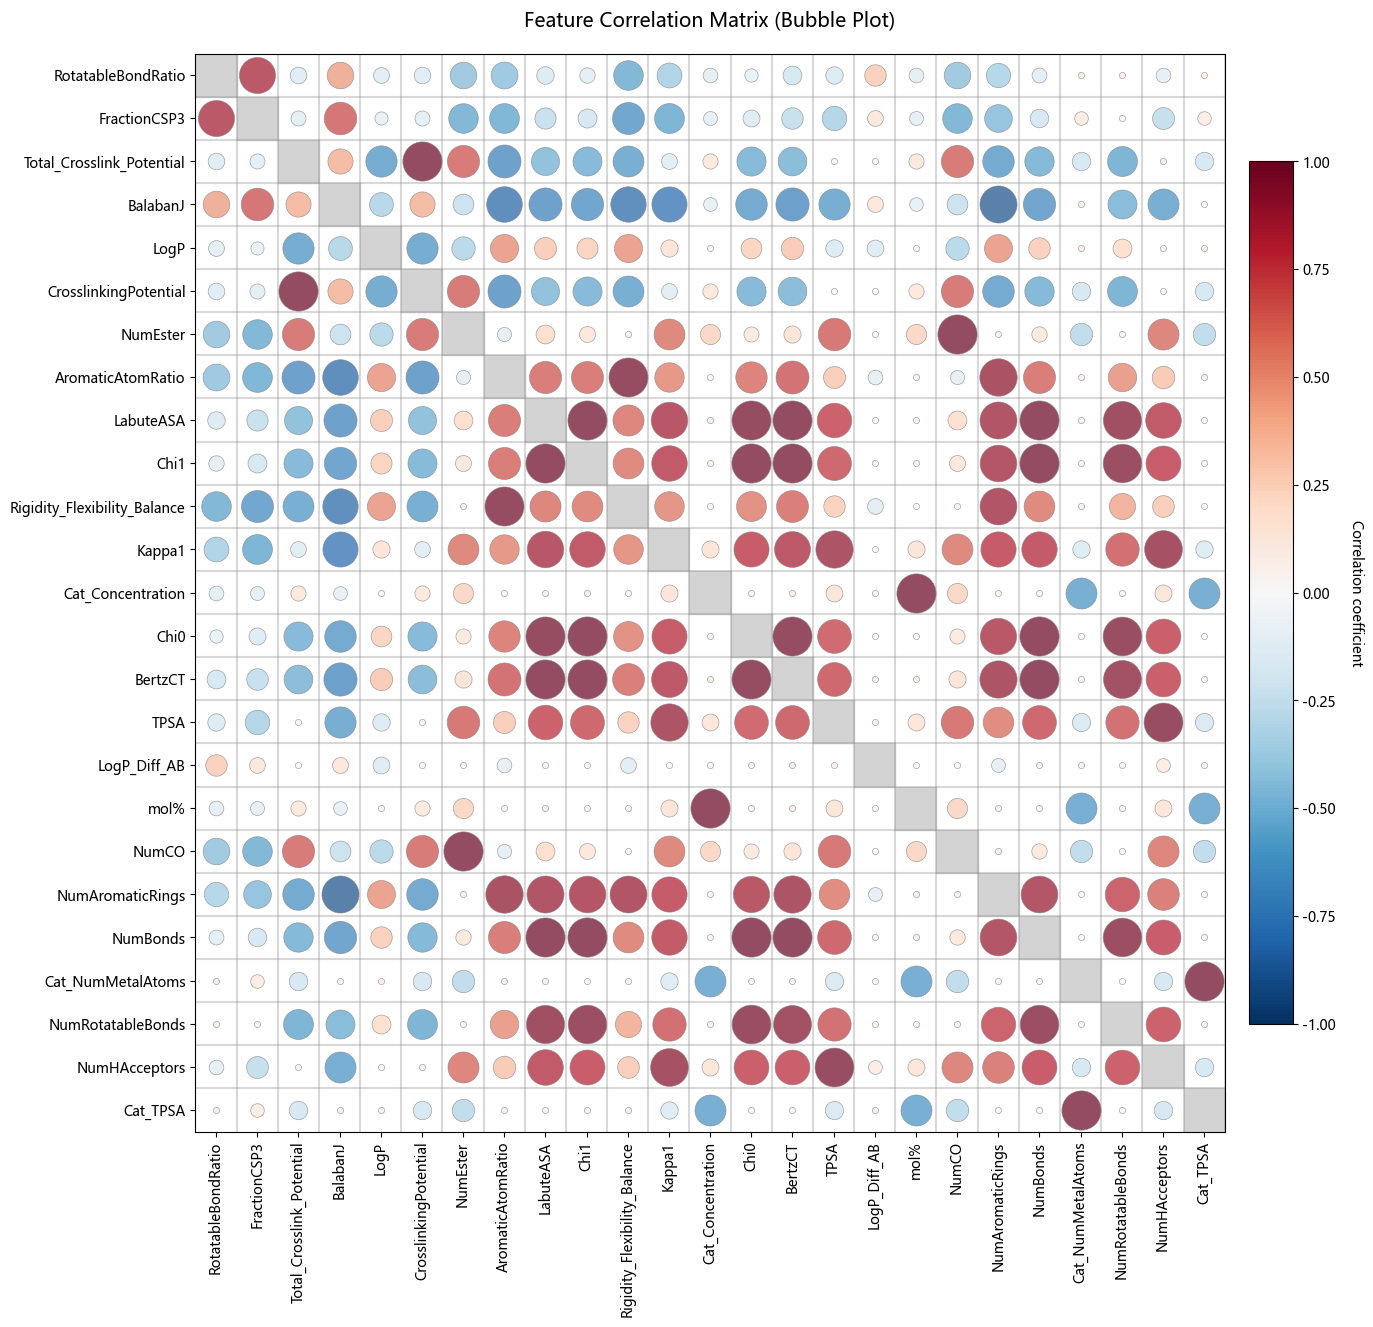

In [56]:
# 改进的气泡相关性图
print("\n创建改进版气泡相关性图...")
plt.figure(figsize=(16, 14))

# 获取相关矩阵
corr_matrix = X[top_25_feature_names].corr()

# 获取特征数量
n_features = len(top_25_feature_names)
features = top_25_feature_names

# 设置颜色映射
cmap = plt.cm.RdBu_r  # Red-Blue colormap reversed
vmin, vmax = -1, 1

# 首先绘制灰色对角线方块
for i in range(n_features+1):
    plt.fill_between([i-1.5, i-0.5], [n_features-i-0.5, n_features-i-0.5], 
                    [n_features-i+0.5, n_features-i+0.5], color='lightgray')

# 绘制网格（不绘制额外的边缘网格）
for i in range(n_features):
    plt.axhline(y=i+0.5, color='gray', linestyle='-', alpha=0.3)
    plt.axvline(x=i+0.5, color='gray', linestyle='-', alpha=0.3)

# 绘制气泡
for i in range(n_features):
    for j in range(n_features):
        # 跳过对角线元素（已经用灰色填充）
        if i == j:
            continue
            
        # 相关系数
        corr = corr_matrix.iloc[i, j]
        # 计算气泡大小 (绝对值越大，气泡越大)
        size = abs(corr) * 800  # 缩放因子可根据需要调整
        # 如果相关性接近0，则让气泡很小
        if abs(corr) < 0.1:
            size = 20
        
        # 设置颜色
        color = cmap((corr + 1) / 2)  # 将-1到1映射到0到1的范围
        
        # 绘制气泡
        plt.scatter(j, n_features-1-i, s=size, c=[color], alpha=0.7, edgecolors='gray', linewidths=0.5)

# 创建自定义colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, pad=0.02, shrink=0.8)
cbar.set_label('Correlation coefficient', rotation=270, labelpad=20)

# 设置轴标签
plt.xticks(range(n_features), features, rotation=90)
plt.yticks(range(n_features), list(reversed(features)))

# 调整绘图区域，确保恰好包含所有数据点
plt.xlim(-0.5, n_features-0.5)
plt.ylim(-0.5, n_features-0.5)


# 调整布局并添加标题
plt.sca(plt.gcf().axes[0])  # 切换回主绘图区
plt.title('Feature Correlation Matrix (Bubble Plot)', fontsize=14, pad=20)

plt.savefig('improved_correlation_bubble_plot.png', dpi=300, bbox_inches='tight')
plt.show()


执行基于训练集的SHAP分析...


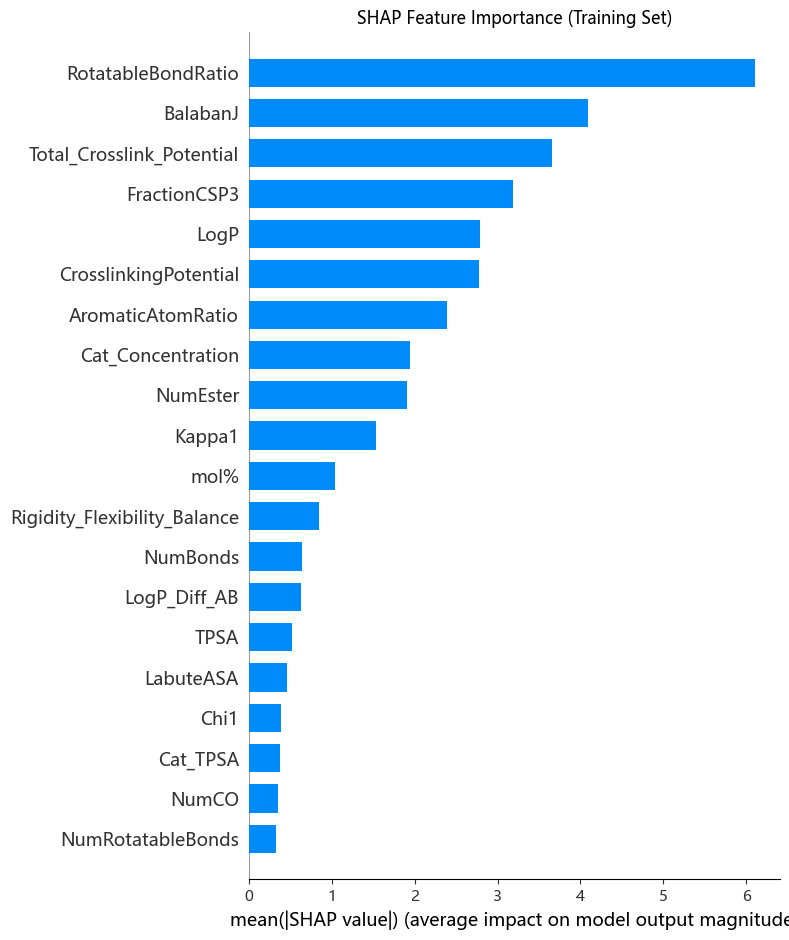

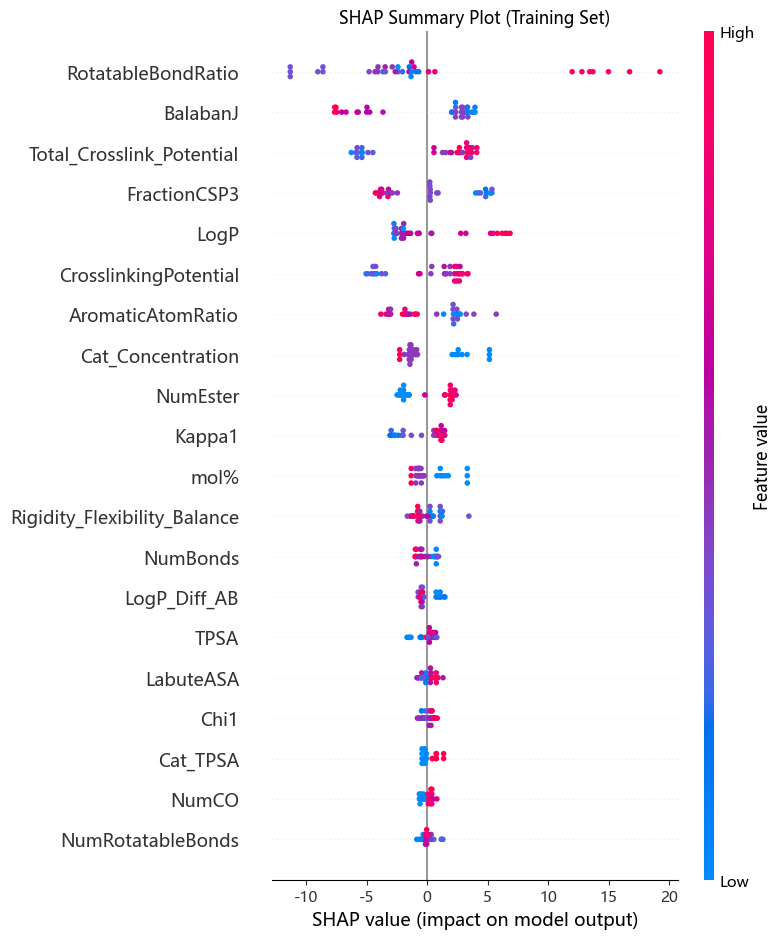


比较训练集和测试集的SHAP值...
训练集和测试集SHAP值对比已保存至 'shap_train_test_comparison.csv'


<Figure size 1200x800 with 0 Axes>

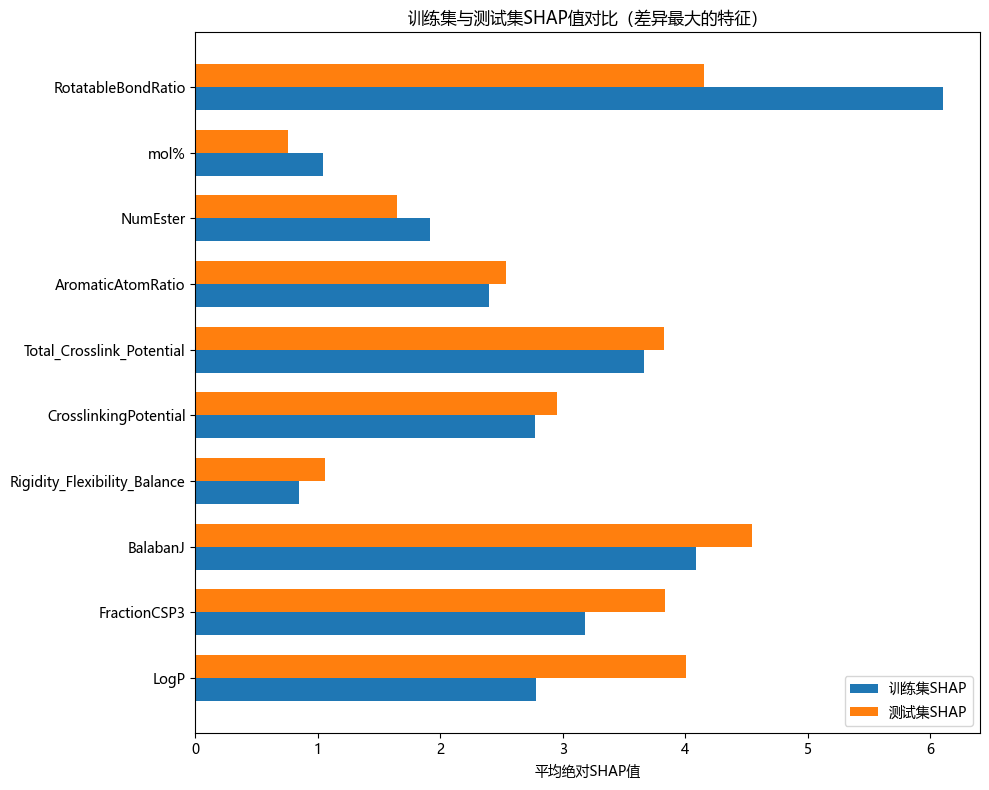

基于训练集的SHAP分析已完成。


In [57]:
# 使用训练集进行SHAP分析
print("\n执行基于训练集的SHAP分析...")

# 由于训练集可能较大，选择一个较小的样本量来避免计算密集
# 通常500-1000个样本足以获得有代表性的SHAP值
train_sample_size = min(500, X_train_top25.shape[0])
X_train_sample = X_train_top25.sample(train_sample_size, random_state=42)
sample_indices = X_train_sample.index

# 创建训练集的SHAP解释器
train_explainer = shap.Explainer(model_top25)
train_shap_values = train_explainer(X_train_sample)

# 绘制基于训练集的SHAP摘要条形图
plt.figure(figsize=(12, 10))
shap.summary_plot(train_shap_values, X_train_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Training Set)')
plt.tight_layout()
plt.savefig('shap_feature_importance_trainset.png', dpi=300)
plt.show()

# 绘制基于训练集的SHAP摘要点图
plt.figure(figsize=(14, 12))
shap.summary_plot(train_shap_values, X_train_sample, show=False)
plt.title('SHAP Summary Plot (Training Set)')
plt.tight_layout()
plt.savefig('shap_summary_plot_trainset.png', dpi=300)
plt.show()

# 对比训练集和测试集的SHAP值
print("\n比较训练集和测试集的SHAP值...")

# 计算平均绝对SHAP值用于对比
train_shap_means = np.abs(train_shap_values.values).mean(0)
test_shap_means = np.abs(shap_values.values).mean(0)

# 创建对比DataFrame
shap_comparison = pd.DataFrame({
    'Feature': top_25_feature_names,
    'Train_SHAP': train_shap_means,
    'Test_SHAP': test_shap_means
})
shap_comparison['Difference'] = shap_comparison['Train_SHAP'] - shap_comparison['Test_SHAP']
shap_comparison = shap_comparison.sort_values('Difference', key=abs, ascending=False)

# 保存对比结果
shap_comparison.to_csv('shap_train_test_comparison.csv', index=False)
print("训练集和测试集SHAP值对比已保存至 'shap_train_test_comparison.csv'")

# 绘制对比图表
plt.figure(figsize=(12, 8))
top_diff_features = shap_comparison.head(10)['Feature'].tolist()
comparison_data = shap_comparison[shap_comparison['Feature'].isin(top_diff_features)].sort_values('Difference')

plt.figure(figsize=(10, 8))
x = np.arange(len(comparison_data))
width = 0.35

plt.barh(x - width/2, comparison_data['Train_SHAP'], width, label='训练集SHAP')
plt.barh(x + width/2, comparison_data['Test_SHAP'], width, label='测试集SHAP')
plt.yticks(x, comparison_data['Feature'])
plt.xlabel('平均绝对SHAP值')
plt.title('训练集与测试集SHAP值对比（差异最大的特征）')
plt.legend()
plt.tight_layout()
plt.savefig('shap_train_test_comparison.png', dpi=300)
plt.show()

print("基于训练集的SHAP分析已完成。")